# DeepFace Review:

### These models DeepFace uses in the background are:
* VGG-Face
* Google FaceNet
* OpenFace
* Facebook DeepFace
* DeepID
* ArcFace
* Dlib

### These models are so good that they have demonstrated that they can analyze images of faces (and even videos) at a level that surpasses what is humanly possible. The face recognition pipeline of DeepFace consists of four stages:
* Detection 
* Alignment
* Representation 
* Verification

In [1]:
!pip install deepface

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ---------------------------------------- 49.6/49.6 kB 2.5 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 1.1 MB/s eta 0:00:00
     ---------------------------------------- 2.3/2.3 MB 935.2 kB/s eta 0:00:00
     ---------------------------------------- 88.3/88.3 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 101.8/101.8 kB 1.9 MB/s eta 0:00:00
     ---------------------------------------- 79.5/79.5 kB 2.2 MB/s eta 0:00:00
     ---------------------------------------- 96.6/96.6 kB 1.4 MB/s eta 0:00:00
     -------------------------------------- 233.6/233.6 kB 1.0 MB/s eta 0:00:00
     ------------------------------------ 266.3/266.3 MB 928.1 kB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 1.0 MB/s eta 0:00:00
     ----------------------

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\lrspr\\anaconda3\\envs\\caut_env\\Lib\\site-packages\\google\\~rotobuf\\internal\\_api_implementation.cp310-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [1]:
from deepface import DeepFace

In [ ]:
import cv2
import mediapipe as mp
import time
from deepface import DeepFace
    
cap = cv2.VideoCapture(0)
pTime = 0
 
mpFaceDetection = mp.solutions.face_detection
mpDraw = mp.solutions.drawing_utils
faceDetection = mpFaceDetection.FaceDetection(0.75)

frame_count = 0

while True:
    success, img = cap.read()
    
    try:
 
        imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        results = faceDetection.process(imgRGB)

        if results.detections:
            for id, detection in enumerate(results.detections):
                # mpDraw.draw_detection(img, detection)
                # print(id, detection)
                # print(detection.score)
                # print(detection.location_data.relative_bounding_box)
                bboxC = detection.location_data.relative_bounding_box
                ih, iw, ic = img.shape
                bbox = int(bboxC.xmin * iw), int(bboxC.ymin * ih), \
                       int(bboxC.width * iw), int(bboxC.height * ih)
                y_start, y_end = bbox[1], (bbox[1]+bbox[3])
                x_start, x_end = bbox[0], (bbox[0]+bbox[2])
                face_cropped = img[y_start:y_end, x_start:x_end]
                cv2.rectangle(img, bbox, (255, 0, 255), 2)
                face_analysis = DeepFace.analyze(face_cropped)
                print("face_analysis for frame {frame_count}:", face_analysis)
                frame_count+=1
                # cv2.putText(img, f'{int(detection.score[0] * 100)}%',
                #             (bbox[0], bbox[1] - 20), cv2.FONT_HERSHEY_PLAIN,
                #             2, (255, 0, 255), 2)

        cTime = time.time()
        fps = 1 / (cTime - pTime)
        pTime = cTime
        # cv2.putText(img, f'FPS: {int(fps)}', (20, 70), cv2.FONT_HERSHEY_PLAIN,
        #             3, (0, 255, 0), 2)
        cv2.imshow("Image", face_cropped)
        cv2.waitKey(1)
    except:
        pass

race_model_single_batch.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/race_model_single_batch.h5
To: C:\Users\lrspr\.deepface\weights\race_model_single_batch.h5
100%|███████████████████████████████████████████████████████████████████████████████| 537M/537M [00:14<00:00, 37.7MB/s]
Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  3.50it/s]


face_analysis for frame {frame_count}: [{'emotion': {'angry': 0.16445438377559185, 'disgust': 0.020809698617085814, 'fear': 48.508599400520325, 'happy': 0.00018318594356969697, 'sad': 51.29292011260986, 'surprise': 9.269933798350394e-06, 'neutral': 0.013024600048083812}, 'dominant_emotion': 'sad', 'region': {'x': 6, 'y': 10, 'w': 117, 'h': 117}, 'age': 22, 'gender': {'Woman': 0.019238154345657676, 'Man': 99.98076558113098}, 'dominant_gender': 'Man', 'race': {'asian': 4.685890302062035, 'indian': 15.215986967086792, 'black': 1.988225057721138, 'white': 19.47016716003418, 'middle eastern': 38.63554298877716, 'latino hispanic': 20.004186034202576}, 'dominant_race': 'middle eastern'}]


Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  6.89it/s]


face_analysis for frame {frame_count}: [{'emotion': {'angry': 63.53838282366004, 'disgust': 6.986252165504953e-06, 'fear': 28.710975800636316, 'happy': 0.08826407832298239, 'sad': 6.554166191319681, 'surprise': 0.00021591171998808844, 'neutral': 1.1079857667701523}, 'dominant_emotion': 'angry', 'region': {'x': 28, 'y': 18, 'w': 82, 'h': 82}, 'age': 22, 'gender': {'Woman': 0.8673837408423424, 'Man': 99.13261532783508}, 'dominant_gender': 'Man', 'race': {'asian': 24.71116034455063, 'indian': 3.4909630412437345, 'black': 0.7215829064895455, 'white': 38.831653525331824, 'middle eastern': 10.651949682947974, 'latino hispanic': 21.592695807975282}, 'dominant_race': 'white'}]


Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  7.00it/s]


face_analysis for frame {frame_count}: [{'emotion': {'angry': 0.5664533004164696, 'disgust': 0.00042275200939911883, 'fear': 0.9944024495780468, 'happy': 95.0090229511261, 'sad': 1.5692507848143578, 'surprise': 6.648767092443109e-08, 'neutral': 1.860448345541954}, 'dominant_emotion': 'happy', 'region': {'x': 16, 'y': 9, 'w': 108, 'h': 108}, 'age': 24, 'gender': {'Woman': 0.021049194037914276, 'Man': 99.97895359992981}, 'dominant_gender': 'Man', 'race': {'asian': 5.457611382007599, 'indian': 3.8705047219991684, 'black': 0.3328523598611355, 'white': 47.75943160057068, 'middle eastern': 27.54383385181427, 'latino hispanic': 15.035766363143921}, 'dominant_race': 'white'}]


Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  6.96it/s]


face_analysis for frame {frame_count}: [{'emotion': {'angry': 0.003238333203832922, 'disgust': 7.425792193004524e-05, 'fear': 0.40085783754931914, 'happy': 6.487934843056153e-06, 'sad': 99.59446189370524, 'surprise': 9.496948238778031e-08, 'neutral': 0.0013610525358653276}, 'dominant_emotion': 'sad', 'region': {'x': 7, 'y': 14, 'w': 112, 'h': 112}, 'age': 24, 'gender': {'Woman': 0.027011553174816072, 'Man': 99.97298121452332}, 'dominant_gender': 'Man', 'race': {'asian': 5.094516277313232, 'indian': 11.26137599349022, 'black': 0.966689083725214, 'white': 24.360056221485138, 'middle eastern': 39.53970670700073, 'latino hispanic': 18.7776580452919}, 'dominant_race': 'middle eastern'}]


Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  7.06it/s]


face_analysis for frame {frame_count}: [{'emotion': {'angry': 0.4516325963744636, 'disgust': 7.786516467235094e-05, 'fear': 0.0928959978191999, 'happy': 68.25441339664619, 'sad': 0.46200203628862335, 'surprise': 0.00016273221156519542, 'neutral': 30.738816349365276}, 'dominant_emotion': 'happy', 'region': {'x': 13, 'y': 8, 'w': 106, 'h': 106}, 'age': 23, 'gender': {'Woman': 0.023082912957761437, 'Man': 99.97691512107849}, 'dominant_gender': 'Man', 'race': {'asian': 1.1109860220866177, 'indian': 1.071441045827741, 'black': 0.04227985706010675, 'white': 68.41239113659964, 'middle eastern': 23.063574962189797, 'latino hispanic': 6.2993228376718955}, 'dominant_race': 'white'}]


Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  7.19it/s]


face_analysis for frame {frame_count}: [{'emotion': {'angry': 5.502072304610747, 'disgust': 3.280994089912591e-05, 'fear': 4.4230121030218665, 'happy': 88.49498560994778, 'sad': 1.5646570363436363, 'surprise': 6.503586390714394e-08, 'neutral': 0.015243386768807427}, 'dominant_emotion': 'happy', 'region': {'x': 9, 'y': 13, 'w': 106, 'h': 106}, 'age': 23, 'gender': {'Woman': 0.025238297530449927, 'Man': 99.97475743293762}, 'dominant_gender': 'Man', 'race': {'asian': 0.4686873219869925, 'indian': 0.9202726733847065, 'black': 0.029513640342161973, 'white': 71.16716332239886, 'middle eastern': 21.714481515555473, 'latino hispanic': 5.699886348836801}, 'dominant_race': 'white'}]


Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  6.91it/s]


face_analysis for frame {frame_count}: [{'emotion': {'angry': 0.0011990005597503127, 'disgust': 2.0278186659797956e-11, 'fear': 58.83839831809978, 'happy': 0.809779766622754, 'sad': 31.966436739735215, 'surprise': 1.8944446049822712e-07, 'neutral': 8.38419373443052}, 'dominant_emotion': 'fear', 'region': {'x': 10, 'y': 12, 'w': 111, 'h': 111}, 'age': 24, 'gender': {'Woman': 0.01526308769825846, 'Man': 99.98472929000854}, 'dominant_gender': 'Man', 'race': {'asian': 0.7022295612841845, 'indian': 1.5377165749669075, 'black': 0.02637903962749988, 'white': 63.223785161972046, 'middle eastern': 29.591837525367737, 'latino hispanic': 4.91805300116539}, 'dominant_race': 'white'}]


Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  6.78it/s]


face_analysis for frame {frame_count}: [{'emotion': {'angry': 0.010752374423343654, 'disgust': 4.240467171327364e-10, 'fear': 30.44931772049175, 'happy': 0.2761572531182917, 'sad': 68.33419611061788, 'surprise': 2.6155001946677164e-08, 'neutral': 0.9295776109145648}, 'dominant_emotion': 'sad', 'region': {'x': 11, 'y': 9, 'w': 110, 'h': 110}, 'age': 24, 'gender': {'Woman': 0.011281771003268659, 'Man': 99.9887228012085}, 'dominant_gender': 'Man', 'race': {'asian': 3.2010240525617633, 'indian': 1.7239219605280138, 'black': 0.05747891606637335, 'white': 62.94852274349467, 'middle eastern': 27.08708209318412, 'latino hispanic': 4.981972574113165}, 'dominant_race': 'white'}]


Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  6.69it/s]


face_analysis for frame {frame_count}: [{'emotion': {'angry': 0.019039519247598946, 'disgust': 9.448916800901264e-12, 'fear': 70.62098979949951, 'happy': 11.408849060535431, 'sad': 17.42592304944992, 'surprise': 2.9850530380848284e-08, 'neutral': 0.5252011585980654}, 'dominant_emotion': 'fear', 'region': {'x': 8, 'y': 8, 'w': 111, 'h': 111}, 'age': 24, 'gender': {'Woman': 0.028737500542774796, 'Man': 99.97126460075378}, 'dominant_gender': 'Man', 'race': {'asian': 1.2427739608451105, 'indian': 0.7147054613951124, 'black': 0.021811974720066768, 'white': 76.39000871121935, 'middle eastern': 17.91949229952647, 'latino hispanic': 3.711205569577549}, 'dominant_race': 'white'}]


Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  6.77it/s]


face_analysis for frame {frame_count}: [{'emotion': {'angry': 0.07345395279116929, 'disgust': 6.801212371065901e-09, 'fear': 33.289867639541626, 'happy': 2.7176694944500923, 'sad': 29.712364077568054, 'surprise': 2.190762948828251e-06, 'neutral': 34.20664668083191}, 'dominant_emotion': 'neutral', 'region': {'x': 16, 'y': 7, 'w': 106, 'h': 106}, 'age': 24, 'gender': {'Woman': 0.006502530595753342, 'Man': 99.99349117279053}, 'dominant_gender': 'Man', 'race': {'asian': 0.8710547350347042, 'indian': 4.090525209903717, 'black': 0.11234348639845848, 'white': 36.22295260429382, 'middle eastern': 49.76094663143158, 'latino hispanic': 8.942172676324844}, 'dominant_race': 'middle eastern'}]


Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  7.00it/s]


face_analysis for frame {frame_count}: [{'emotion': {'angry': 0.00023331012042964363, 'disgust': 5.744577465421513e-10, 'fear': 2.786562385354184, 'happy': 3.6740625604428385, 'sad': 63.21024079383855, 'surprise': 1.682710848815828e-07, 'neutral': 30.328901429706896}, 'dominant_emotion': 'sad', 'region': {'x': 15, 'y': 8, 'w': 106, 'h': 106}, 'age': 24, 'gender': {'Woman': 0.019204798445571214, 'Man': 99.98080134391785}, 'dominant_gender': 'Man', 'race': {'asian': 6.986675411462784, 'indian': 5.815142393112183, 'black': 0.20114597864449024, 'white': 38.47131431102753, 'middle eastern': 39.35358226299286, 'latino hispanic': 9.172140061855316}, 'dominant_race': 'middle eastern'}]


# DeepFace insights:
### Does not provide Action Units, but only provides emotions instead. This is not sufficient for our use. Furthermore, the FPS when running with DeepFace is very low.

------------------------------------------------------------------------------------------------

# MediaPipe coordinate plot:

img.shape: <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=231x244 at 0x20211438490>
img.shape: (2040, 2040, 3)
total_count: 478


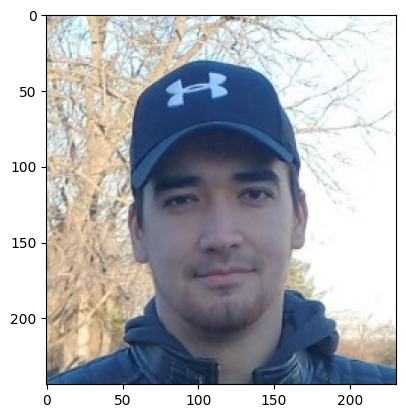

In [17]:
import cv2
from matplotlib import pyplot as plt
import mediapipe as mp
from PIL import ImageFont, ImageDraw, Image, ImageOps
import numpy as np


def align_face(img):
    pass
    
def plot_coordinates(verbose=True):
    
    detected_keypoints_coordinates = []
    font = ImageFont.truetype("arial.ttf", 10)
    
    img = Image.open("img_sample.jpg")
    plt.imshow(img)
    print("img.shape:", img)
    img = ImageOps.fit(img, (2040,2040))
    img = np.asarray(img)
    print("img.shape:", img.shape)
    
    
    
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    # Media Pipe Initialization:
    mp_drawing = mp.solutions.drawing_utils
    mp_drawing_styles = mp.solutions.drawing_styles
    mp_face_mesh = mp.solutions.face_mesh
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    with mp_face_mesh.FaceMesh(
                               max_num_faces=1,
                               refine_landmarks=True,
                               min_detection_confidence=0.5,
                               min_tracking_confidence=0.5) as face_mesh:
        img.flags.writeable = False
        image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        results = face_mesh.process(image)
        
        total_count = 0
        
        
        #####################################################
        if results.multi_face_landmarks:
            current_coordinate_set = []
            for face in results.multi_face_landmarks:
                for landmark in face.landmark:
                    x = landmark.x
                    y = landmark.y
                    z = landmark.z
                    
                    current_coordinate_set.append([x,y,z])

                    if verbose:
                        shape = image.shape 
                        relative_x = int(x * shape[1])
                        relative_y = int(y * shape[0])

                        # cv2.circle(image, (relative_x, relative_y), radius=1, color=(225, 0, 100), thickness=1)
                        # cv2.putText(image, f"{total_count}", (relative_x, relative_y), cv2.FONT_HERSHEY_SIMPLEX, 0.01, 120)
                        pil_im = Image.fromarray(image)
                        draw = ImageDraw.Draw(pil_im)
                        # Choose a font
                        # font = ImageFont.truetype("Roboto-Regular.ttf", 50)
                        # Draw the text
                        draw.text((relative_x, relative_y), f"{total_count}", font=font)  # , font=font)
                        image = cv2_im_processed = cv2.cvtColor(np.array(pil_im), cv2.COLOR_RGB2BGR)
                    total_count+=1
        else:
            # print(traceback.format_exc())
            x, y, z = 0.0, 0.0, 0.0
            current_coordinate_set.append([x,y,z]*478)
        
        print("total_count:", total_count)
            
        # Append detected_keypoints_coordinates:
        detected_keypoints_coordinates.append(current_coordinate_set)               

        # if verbose:
        #    pass  # cv2.imshow('MediaPipe Face Mesh', cv2.flip(image, 1))
        # plt.figure()  # figsize=(15,15))
        # plt.imshow(image)
        # plt.savefig('mediaPipe_coordinates_location.png')
        cv2.imwrite('mediaPipe_coordinates_location.png', image)
        #####################################################
    
    
plot_coordinates()

# Face Alignment:

In [1]:
import cv2
from matplotlib import pyplot as plt
import mediapipe as mp
from PIL import ImageFont, ImageDraw, Image
import numpy as np
import math
import traceback


def align_face(img):
    pass
    
def test_alignment(verbose=True):
    
    detected_keypoints_coordinates = []
    
    # img = cv2.imread("img_sample.jpg")
    # plt.imshow(img)    
    aligned_face = None
    cap = cv2.VideoCapture(0)
    while True:
        success, img = cap.read()
        
        try:
    
            #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
            # Media Pipe Initialization:
            mp_drawing = mp.solutions.drawing_utils
            mp_drawing_styles = mp.solutions.drawing_styles
            mp_face_mesh = mp.solutions.face_mesh
            #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
            with mp_face_mesh.FaceMesh(
                                       max_num_faces=1,
                                       refine_landmarks=True,
                                       min_detection_confidence=0.5,
                                       min_tracking_confidence=0.5) as face_mesh:
                img.flags.writeable = False
                image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                results = face_mesh.process(image)

                total_count = 0


                #####################################################
                if results.multi_face_landmarks:
                    current_coordinate_set = []
        
                    for face in results.multi_face_landmarks:
                        # eye coordinate storage for current face:
                        eye_dictionary = {}
                        for landmark in face.landmark:
                            x = landmark.x
                            y = landmark.y
                            z = landmark.z

                            current_coordinate_set.append([x,y,z])

                            if verbose:
                                shape = image.shape 
                                relative_x = int(x * shape[1])
                                relative_y = int(y * shape[0])

                                # 468 eye from our left, 473 eye from our right.
                                if total_count==468 or total_count==473:
                                    cv2.circle(image, (relative_x, relative_y), radius=1, color=(225, 255, 255), thickness=1)
                                    # storing data for that:
                                    eye_dictionary[total_count] = [relative_x, relative_y]
                            total_count+=1

                        # calculating face alignment (https://www.youtube.com/watch?v=WA9i68g4meI&ab_channel=SefikIlkinSerengil):
                        x_right_eye, y_right_eye = eye_dictionary[468][0], eye_dictionary[468][1]
                        x_left_eye,  y_left_eye  = eye_dictionary[473][0], eye_dictionary[473][1]

                        a = abs(y_right_eye-y_left_eye)
                        b = abs(x_left_eye-x_right_eye)
                        c = math.sqrt(a*a + b*b)
                        # print(f"a={a}, b={b}, c={c}")

                        cos_alpha = (b*b + c*c - a*a) / (2*b*c)
                        # print(f"cos_alpha={cos_alpha}")

                        alpha = np.arccos(cos_alpha)  # radius
                        alpha = (alpha*180) / math.pi
                        
                        direction = 1
                        if y_left_eye < y_right_eye:
                            direction = -1
                        else:
                            direction = 1
                            
                        alpha = direction*alpha
                        
                        print(f"alpha={alpha}")

                        # finally, align it:
                        aligned_face = Image.fromarray(image)
                        aligned_face = np.array(aligned_face.rotate(alpha))[:, :, ::-1].copy()

                else:
                    # print(traceback.format_exc())
                    x, y, z = 0.0, 0.0, 0.0
                    current_coordinate_set.append([x,y,z]*478)

                print("total_count:", total_count)

                # Append detected_keypoints_coordinates:
                detected_keypoints_coordinates.append(current_coordinate_set)               

                # if verbose:
                #    pass  # cv2.imshow('MediaPipe Face Mesh', cv2.flip(image, 1))
                # plt.figure()  # figsize=(30,30))
                # plt.imshow(image)

                # plt.figure()
                # plt.imshow(aligned_face)
                #####################################################
            if aligned_face is not None:
                cv2.imshow("Image", aligned_face)
                if cv2.waitKey(33) == ord('q'):
                    break
    
        except:
            print("\n***ERROR***\n")
            print(traceback.format_exc())
            if aligned_face is not None:
                print(aligned_face.shape)
            print("*******")
    cap.release()
    cv2.destroyAllWindows()
            
    
test_alignment()

alpha=11.76828893202063
total_count: 478
alpha=10.491477012331634
total_count: 478
alpha=8.130102354156005
total_count: 478
alpha=4.927109947648964
total_count: 478
alpha=6.881723630636913
total_count: 478
alpha=3.945186229037602
total_count: 478
alpha=2.9609361341637563
total_count: 478
alpha=1.005086005254142
total_count: 478
alpha=0.0
total_count: 478
alpha=-1.9091524329963898
total_count: 478
alpha=-2.815556684211221
total_count: 478
alpha=-4.6858998395027
total_count: 478
alpha=-3.6329507394881446
total_count: 478
alpha=-3.521453376922158
total_count: 478
alpha=-4.332313983188472
total_count: 478
alpha=-4.969740728110216
total_count: 478
alpha=-6.5198017516569164
total_count: 478
alpha=-6.4287477488297915
total_count: 478
alpha=-6.340191745909908
total_count: 478
alpha=-5.710593137499633
total_count: 478
alpha=-5.79279649503215
total_count: 478
alpha=-7.800187884181755
total_count: 478
alpha=-7.6960517220165565
total_count: 478
alpha=-6.84277341263097
total_count: 478
alpha=-7.495

alpha=-6.340191745909908
total_count: 478
alpha=-5.552971033036766
total_count: 478
alpha=-4.028263666485285
total_count: 478
alpha=-4.028263666485285
total_count: 478
alpha=-4.8304199582900225
total_count: 478
alpha=-4.899092453787849
total_count: 478
alpha=-7.43140797117249
total_count: 478
alpha=-4.76364169072622
total_count: 478
alpha=-7.907162702958464
total_count: 478
alpha=-7.907162702958464
total_count: 478
alpha=-7.02839623894957
total_count: 478
alpha=-5.79279649503215
total_count: 478
alpha=-4.899092453787849
total_count: 478
alpha=-4.899092453787849
total_count: 478
alpha=-5.964487101253087
total_count: 478
alpha=-14.697319279511907
total_count: 478
alpha=-15.172915345525269
total_count: 478
alpha=-18.08344538304867
total_count: 478
alpha=-26.029592191513455
total_count: 478
alpha=-27.121303404158674
total_count: 478
alpha=-39.47245984834382
total_count: 478
alpha=-35.394795844987065
total_count: 478
alpha=-39.64417495714481
total_count: 478
alpha=-44.19307054489764
total_c

alpha=15.195248526819878
total_count: 478
alpha=16.955313052025186
total_count: 478
alpha=16.762554461832742
total_count: 478
alpha=17.59242456218163
total_count: 478
alpha=16.955313052025186
total_count: 478
alpha=18.22507511135447
total_count: 478
alpha=18.64953875405142
total_count: 478
alpha=18.853158764419092
total_count: 478
alpha=18.64953875405142
total_count: 478
alpha=19.290046219188728
total_count: 478
alpha=18.019769281777165
total_count: 478
alpha=17.59242456218163
total_count: 478
alpha=9.806092759897044
total_count: 478
alpha=8.13010235415596
total_count: 478
alpha=-7.373766361330138
total_count: 478
alpha=-6.340191745909908
total_count: 478
alpha=-12.144278049567014
total_count: 478
alpha=-12.74528947313286
total_count: 478
alpha=-25.5599651718238
total_count: 478
alpha=-28.300755766006375
total_count: 478
alpha=-35.53767779197438
total_count: 478
alpha=-37.04247477308285
total_count: 478
alpha=-45.00000000000001
total_count: 478
alpha=-47.385944030388806
total_count: 47

alpha=12.2647737278924
total_count: 478
alpha=11.633633998940427
total_count: 478
alpha=12.61932229343077
total_count: 478
alpha=11.80243420778352
total_count: 478
alpha=11.633633998940427
total_count: 478
alpha=9.865806943084403
total_count: 478
alpha=9.865806943084403
total_count: 478
alpha=10.520784313874314
total_count: 478
alpha=10.520784313874314
total_count: 478
alpha=10.669782804496661
total_count: 478
alpha=10.520784313874314
total_count: 478
alpha=10.669782804496661
total_count: 478
alpha=10.669782804496661
total_count: 478
alpha=10.669782804496661
total_count: 478
alpha=8.246320814468481
total_count: 478
alpha=8.36588612403259
total_count: 478
alpha=8.13010235415596
total_count: 478
alpha=7.43140797117249
total_count: 478
alpha=4.899092453787849
total_count: 478
alpha=5.79279649503215
total_count: 478
alpha=8.80679269443528
total_count: 478
alpha=9.727578551401624
total_count: 478
alpha=11.309932474020227
total_count: 478
alpha=18.434948822922017
total_count: 478
alpha=25.86

alpha=33.89300332262772
total_count: 478
alpha=33.90279840308348
total_count: 478
alpha=34.27694358973687
total_count: 478
alpha=32.35590918784278
total_count: 478
alpha=32.424534500255575
total_count: 478
alpha=31.64769570125726
total_count: 478
alpha=31.64769570125726
total_count: 478
alpha=29.14297798197174
total_count: 478
alpha=29.291362170984243
total_count: 478
alpha=33.690067525979785
total_count: 478
alpha=35.43331401028559
total_count: 478
alpha=36.8107078120311
total_count: 478
alpha=40.914383220025115
total_count: 478
alpha=41.922544600575634
total_count: 478
alpha=41.900367879468696
total_count: 478
alpha=42.09618113490372
total_count: 478
alpha=41.65805614273887
total_count: 478
alpha=37.405356631408544
total_count: 478
alpha=35.01650557292838
total_count: 478
alpha=32.424534500255575
total_count: 478
alpha=19.546367733341857
total_count: 478
alpha=15.989639737312594
total_count: 478
alpha=4.600095666263352
total_count: 478
alpha=0.9992436702570842
total_count: 478
alpha=

alpha=40.126103577795234
total_count: 478
alpha=40.049727765708255
total_count: 478
alpha=39.64417495714481
total_count: 478
alpha=39.15543412261313
total_count: 478
alpha=40.049727765708255
total_count: 478
alpha=39.15543412261313
total_count: 478
alpha=40.049727765708255
total_count: 478
alpha=38.55839990066497
total_count: 478
alpha=38.96674699379928
total_count: 478
alpha=40.74616356388081
total_count: 478
alpha=41.185925165709655
total_count: 478
alpha=40.44623202084138
total_count: 478
alpha=39.9868862449642
total_count: 478
alpha=35.90972307917769
total_count: 478
alpha=33.47627829610267
total_count: 478
alpha=28.35496178532406
total_count: 478
alpha=27.276763383113696
total_count: 478
alpha=27.276763383113696
total_count: 478
alpha=26.18811069748085
total_count: 478
alpha=26.56505117707799
total_count: 478
alpha=23.682087724538455
total_count: 478
alpha=22.83365417791755
total_count: 478
alpha=23.07041224982466
total_count: 478
alpha=23.07041224982466
total_count: 478
alpha=22.

alpha=-12.308015817427924
total_count: 478
alpha=-15.255118703057791
total_count: 478
alpha=-13.535856369134248
total_count: 478
alpha=-13.069317896282163
total_count: 478
alpha=-12.26477372789243
total_count: 478
alpha=-14.281095735970839
total_count: 478
alpha=-10.007979801441312
total_count: 478
alpha=-7.815293546766871
total_count: 478
alpha=-6.581944655178027
total_count: 478
alpha=-8.914926957147863
total_count: 478
alpha=-14.036243467926484
total_count: 478
alpha=-8.74616226255517
total_count: 478
alpha=-7.666804261814217
total_count: 478
alpha=-5.290081205371211
total_count: 478
alpha=-1.041626676010165
total_count: 478
alpha=-3.012787504183286
total_count: 478
alpha=-3.945186229037602
total_count: 478
alpha=-3.945186229037602
total_count: 478
alpha=-4.844000375080699
total_count: 478
alpha=-5.6175805901268605
total_count: 478
alpha=-6.441600099335006
total_count: 478
alpha=-4.467159061389333
total_count: 478
alpha=-3.301865674434948
total_count: 478
alpha=-9.30994017498601
tot

alpha=9.130176482278706
total_count: 478
alpha=9.950626687951624
total_count: 478
alpha=10.922804719869259
total_count: 478
alpha=13.348727113287385
total_count: 478
alpha=14.500166766552589
total_count: 478
alpha=15.819193947500146
total_count: 478
alpha=15.572543596810275
total_count: 478
alpha=15.708637829015741
total_count: 478
alpha=15.478638165418374
total_count: 478
alpha=15.478638165418374
total_count: 478
alpha=10.520784313874314
total_count: 478
alpha=9.727578551401624
total_count: 478
alpha=5.47736872882884
total_count: 478
alpha=2.2906100426384346
total_count: 478
alpha=1.548157698977982
total_count: 478
alpha=0.7742201649275634
total_count: 478
alpha=-3.8654611698517494
total_count: 478
alpha=-5.403791360249727
total_count: 478
alpha=-11.76828893202063
total_count: 478
alpha=-11.76828893202063
total_count: 478
alpha=-10.234802763423172
total_count: 478
alpha=-9.593134262730356
total_count: 478
alpha=-8.246320814468481
total_count: 478
alpha=-6.5198017516569164
total_count:

alpha=45.50702906091478
total_count: 478
alpha=46.04162667600997
total_count: 478
alpha=46.12330271407543
total_count: 478
alpha=42.51044707800085
total_count: 478
alpha=37.450578231736735
total_count: 478
alpha=12.90740867126582
total_count: 478
alpha=8.297144969836856
total_count: 478
alpha=-19.057704510128318
total_count: 478
alpha=-22.61986494804042
total_count: 478
alpha=-29.74488129694221
total_count: 478
alpha=-29.05460409907715
total_count: 478
alpha=-28.113208876055964
total_count: 478
alpha=-21.938480467706484
total_count: 478
alpha=-18.666914274220215
total_count: 478
alpha=-1.735704588928346
total_count: 478
alpha=-5.906141113770498
total_count: 478
alpha=17.175903615746765
total_count: 478
alpha=19.573125830410202
total_count: 478
alpha=49.969740728110295
total_count: 478
alpha=50.19442890773481
total_count: 478
alpha=21.250505507133255
total_count: 478
alpha=16.69924423399364
total_count: 478
alpha=8.84181456019167
total_count: 478
alpha=15.945395900922858
total_count: 47

alpha=14.38139459109062
total_count: 478
alpha=12.994616791916512
total_count: 478
alpha=14.38139459109062
total_count: 478
alpha=16.144338780283483
total_count: 478
alpha=15.751173663453049
total_count: 478
alpha=17.525568373722855
total_count: 478
alpha=17.525568373722855
total_count: 478
alpha=17.102728969052368
total_count: 478
alpha=17.525568373722855
total_count: 478
alpha=16.144338780283483
total_count: 478
alpha=16.144338780283483
total_count: 478
alpha=16.144338780283483
total_count: 478
alpha=15.751173663453049
total_count: 478
alpha=17.525568373722855
total_count: 478
alpha=15.751173663453049
total_count: 478
alpha=15.751173663453049
total_count: 478
alpha=11.888658039627996
total_count: 478
alpha=10.437475351118193
total_count: 478
alpha=5.856013585428968
total_count: 478
alpha=4.3987053549954265
total_count: 478
alpha=4.3987053549954265
total_count: 478
alpha=4.289153328819096
total_count: 478
alpha=4.3987053549954265
total_count: 478
alpha=5.856013585428968
total_count: 4

alpha=0.0
total_count: 478
alpha=0.0
total_count: 478
alpha=0.0
total_count: 478
alpha=1.548157698977982
total_count: 478
alpha=1.548157698977982
total_count: 478
alpha=1.548157698977982
total_count: 478
alpha=1.548157698977982
total_count: 478
alpha=3.094058058917231
total_count: 478
alpha=1.548157698977982
total_count: 478
alpha=1.548157698977982
total_count: 478
alpha=1.5911402711948106
total_count: 478
alpha=1.548157698977982
total_count: 478
alpha=4.76364169072622
total_count: 478
alpha=1.5911402711948106
total_count: 478
alpha=1.548157698977982
total_count: 478
alpha=1.5911402711948106
total_count: 478
alpha=3.094058058917231
total_count: 478
alpha=1.548157698977982
total_count: 478
alpha=3.094058058917231
total_count: 478
alpha=1.5911402711948106
total_count: 478
alpha=3.1798301198641643
total_count: 478
alpha=3.36646066342994
total_count: 478
alpha=3.1798301198641643
total_count: 478
alpha=3.1798301198641643
total_count: 478
alpha=3.1798301198641643
total_count: 478
alpha=4.763

In [ ]:
import cv2
import mediapipe as mp
import numpy as np

from videosource import WebcamSource

from custom.face_geometry import (  # isort:skip
    PCF,
    get_metric_landmarks,
    procrustes_landmark_basis,
)

mp_drawing = mp.solutions.drawing_utils
mp_face_mesh = mp.solutions.face_mesh
mp_face_mesh_connections = mp.solutions.face_mesh_connections
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=3)

points_idx = [33, 263, 61, 291, 199]
points_idx = points_idx + [key for (key, val) in procrustes_landmark_basis]
points_idx = list(set(points_idx))
points_idx.sort()

# uncomment next line to use all points for PnP algorithm
# points_idx = list(range(0,468)); points_idx[0:2] = points_idx[0:2:-1];

frame_height, frame_width, channels = (720, 1280, 3)

# pseudo camera internals
focal_length = frame_width
center = (frame_width / 2, frame_height / 2)
camera_matrix = np.array(
    [[focal_length, 0, center[0]], [0, focal_length, center[1]], [0, 0, 1]],
    dtype="double",
)

dist_coeff = np.zeros((4, 1))


def alignment():
    source = WebcamSource()

    refine_landmarks = True

    pcf = PCF(
        near=1,
        far=10000,
        frame_height=frame_height,
        frame_width=frame_width,
        fy=camera_matrix[1, 1],
    )

    with mp_face_mesh.FaceMesh(
        static_image_mode=False,
        refine_landmarks=refine_landmarks,
        min_detection_confidence=0.5,
        min_tracking_confidence=0.5,
    ) as face_mesh:

        for idx, (frame, frame_rgb) in enumerate(source):
            results = face_mesh.process(frame_rgb)
            multi_face_landmarks = results.multi_face_landmarks

            if multi_face_landmarks:
                face_landmarks = multi_face_landmarks[0]
                landmarks = np.array(
                    [(lm.x, lm.y, lm.z) for lm in face_landmarks.landmark]
                )
                # print(landmarks.shape)
                landmarks = landmarks.T

                if refine_landmarks:
                    landmarks = landmarks[:, :468]

                metric_landmarks, pose_transform_mat = get_metric_landmarks(
                    landmarks.copy(), pcf
                )

                image_points = (
                    landmarks[0:2, points_idx].T
                    * np.array([frame_width, frame_height])[None, :]
                )
                model_points = metric_landmarks[0:3, points_idx].T

                # see here:
                # https://github.com/google/mediapipe/issues/1379#issuecomment-752534379
                pose_transform_mat[1:3, :] = -pose_transform_mat[1:3, :]
                mp_rotation_vector, _ = cv2.Rodrigues(pose_transform_mat[:3, :3])
                mp_translation_vector = pose_transform_mat[:3, 3, None]

                if False:
                    # sanity check
                    # get same result with solvePnP

                    success, rotation_vector, translation_vector = cv2.solvePnP(
                        model_points,
                        image_points,
                        camera_matrix,
                        dist_coeff,
                        flags=cv2.cv2.SOLVEPNP_ITERATIVE,
                    )

                    np.testing.assert_almost_equal(mp_rotation_vector, rotation_vector)
                    np.testing.assert_almost_equal(
                        mp_translation_vector, translation_vector
                    )

                for face_landmarks in multi_face_landmarks:
                    mp_drawing.draw_landmarks(
                        image=frame,
                        landmark_list=face_landmarks,
                        connections=mp_face_mesh_connections.FACEMESH_TESSELATION,
                        landmark_drawing_spec=drawing_spec,
                        connection_drawing_spec=drawing_spec,
                    )

                nose_tip = model_points[0]
                nose_tip_extended = 2.5 * model_points[0]
                (nose_pointer2D, jacobian) = cv2.projectPoints(
                    np.array([nose_tip, nose_tip_extended]),
                    mp_rotation_vector,
                    mp_translation_vector,
                    camera_matrix,
                    dist_coeff,
                )

                nose_tip_2D, nose_tip_2D_extended = nose_pointer2D.squeeze().astype(int)
                frame = cv2.line(
                    frame, nose_tip_2D, nose_tip_2D_extended, (255, 0, 0), 2
                )

            source.show(frame)
            
alignment()

####################################

In [ ]:
import numpy as np
import mediapipe as mp
import cv2

from face_geometry import get_metric_landmarks, PCF, canonical_metric_landmarks, procrustes_landmark_basis

mp_drawing = mp.solutions.drawing_utils
mp_face_mesh = mp.solutions.face_mesh

points_idx = [33,263,61,291,199]
points_idx = points_idx + [key for (key,val) in procrustes_landmark_basis]
points_idx = list(set(points_idx))
points_idx.sort()
# points_idx = list(range(0,468)); points_idx[0:2] = points_idx[0:2:-1];

frame_height, frame_width, channels = (720, 1280, 3)

# pseudo camera internals
focal_length = frame_width
center = (frame_width/2, frame_height/2)
camera_matrix = np.array(
                         [[focal_length, 0, center[0]],
                         [0, focal_length, center[1]],
                         [0, 0, 1]], dtype = "double"
                         )

dist_coeff = np.zeros((4, 1))

def main():
    source = WebcamSource()

    pcf = PCF(near=1,far=10000,frame_height=frame_height,frame_width=frame_width,fy=camera_matrix[1,1])

    for idx, (frame, frame_rgb) in enumerate(source):

        # print(idx)
        
        face_mesh = mp_face_mesh.FaceMesh(static_image_mode=False, min_detection_confidence=0.5, min_tracking_confidence=0.5)
        results = face_mesh.process(frame)
        multi_face_landmarks = results.multi_face_landmarks

        if multi_face_landmarks:
            face_landmarks = results.multi_face_landmarks[0]
            landmarks = np.array([(lm.x,lm.y,lm.z) for lm in face_landmarks.landmark])
            landmarks = landmarks.T

            metric_landmarks, pose_transform_mat = get_metric_landmarks(landmarks.copy(), pcf)
            model_points = metric_landmarks[0:3, points_idx].T
            image_points = landmarks[0:2, points_idx].T * np.array([frame_width, frame_height])[None,:]

            success, rotation_vector, translation_vector = cv2.solvePnP(model_points, image_points, camera_matrix, dist_coeff, flags=cv2.cv2.SOLVEPNP_ITERATIVE)
            # _, rotation_vector, translation_vector, inliers = cv2.solvePnPRansac(model_points, image_points, camera_matrix, dist_coeff)

            (nose_end_point2D, jacobian) = cv2.projectPoints(np.array([(0.0, 0.0, 25.0)]), rotation_vector, translation_vector, camera_matrix, dist_coeff)

            for ii in points_idx: # range(landmarks.shape[1]):
                pos = np.array((frame_width*landmarks[0, ii], frame_height*landmarks[1, ii])).astype(np.int32)
                frame = cv2.circle(frame, tuple(pos), 1, (0, 255, 255), -1)

            p1 = ( int(image_points[0][0]), int(image_points[0][1]))
            p2 = ( int(nose_end_point2D[0][0][0]), int(nose_end_point2D[0][0][1]))

            frame = cv2.line(frame, p1, p2, (255,0,0), 2)



        source.show(frame)

if __name__ == '__main__':
    main()

In [ ]:
from webcamsource import WebcamSource
import numpy as np
import mediapipe as mp
import cv2

from face_geometry import get_metric_landmarks, PCF, canonical_metric_landmarks, procrustes_landmark_basis

mp_drawing = mp.solutions.drawing_utils
mp_face_mesh = mp.solutions.face_mesh

points_idx = [33,263,61,291,199]
points_idx = points_idx + [key for (key,val) in procrustes_landmark_basis]
points_idx = list(set(points_idx))
points_idx.sort()
# points_idx = list(range(0,468)); points_idx[0:2] = points_idx[0:2:-1];

frame_height, frame_width, channels = (720, 1280, 3)

# pseudo camera internals
focal_length = frame_width
center = (frame_width/2, frame_height/2)
camera_matrix = np.array(
                         [[focal_length, 0, center[0]],
                         [0, focal_length, center[1]],
                         [0, 0, 1]], dtype = "double"
                         )

dist_coeff = np.zeros((4, 1))

def main():
    source = WebcamSource()

    pcf = PCF(near=1,far=10000,frame_height=frame_height,frame_width=frame_width,fy=camera_matrix[1,1])

    for idx, (frame, frame_rgb) in enumerate(source):

        # print(idx)
        
        face_mesh = mp_face_mesh.FaceMesh(static_image_mode=False, min_detection_confidence=0.5, min_tracking_confidence=0.5)
        results = face_mesh.process(frame)
        multi_face_landmarks = results.multi_face_landmarks

        if multi_face_landmarks:
            face_landmarks = results.multi_face_landmarks[0]
            landmarks = np.array([(lm.x,lm.y,lm.z) for lm in face_landmarks.landmark])
            landmarks = landmarks.T

            metric_landmarks, pose_transform_mat = get_metric_landmarks(landmarks.copy(), pcf)
            model_points = metric_landmarks[0:3, points_idx].T
            image_points = landmarks[0:2, points_idx].T * np.array([frame_width, frame_height])[None,:]

            success, rotation_vector, translation_vector = cv2.solvePnP(model_points, image_points, camera_matrix, dist_coeff, flags=cv2.cv2.SOLVEPNP_ITERATIVE)
            # _, rotation_vector, translation_vector, inliers = cv2.solvePnPRansac(model_points, image_points, camera_matrix, dist_coeff)

            (nose_end_point2D, jacobian) = cv2.projectPoints(np.array([(0.0, 0.0, 25.0)]), rotation_vector, translation_vector, camera_matrix, dist_coeff)

            for ii in points_idx: # range(landmarks.shape[1]):
                pos = np.array((frame_width*landmarks[0, ii], frame_height*landmarks[1, ii])).astype(np.int32)
                frame = cv2.circle(frame, tuple(pos), 1, (0, 255, 255), -1)

            p1 = ( int(image_points[0][0]), int(image_points[0][1]))
            p2 = ( int(nose_end_point2D[0][0][0]), int(nose_end_point2D[0][0][1]))

            frame = cv2.line(frame, p1, p2, (255,0,0), 2)



        source.show(frame)

if __name__ == '__main__':
    main()

In [1]:
from webcamsource import WebcamSource
import numpy as np
import mediapipe as mp
import cv2

from face_geometry import get_metric_landmarks, PCF, canonical_metric_landmarks, procrustes_landmark_basis

mp_drawing = mp.solutions.drawing_utils
mp_face_mesh = mp.solutions.face_mesh

points_idx = [33,263,61,291,199]
points_idx = points_idx + [key for (key,val) in procrustes_landmark_basis]
points_idx = list(set(points_idx))
points_idx.sort()
# points_idx = list(range(0,468)); points_idx[0:2] = points_idx[0:2:-1];

frame_height, frame_width, channels = (720, 1280, 3)

# pseudo camera internals
focal_length = frame_width
center = (frame_width/2, frame_height/2)
camera_matrix = np.array(
                         [[focal_length, 0, center[0]],
                         [0, focal_length, center[1]],
                         [0, 0, 1]], dtype = "double"
                         )

dist_coeff = np.zeros((4, 1))

def main():
    source = WebcamSource()

    pcf = PCF(near=1,far=10000,frame_height=frame_height,frame_width=frame_width,fy=camera_matrix[1,1])

    for idx, (frame, frame_rgb) in enumerate(source):

        # print(idx)
        
        face_mesh = mp_face_mesh.FaceMesh(static_image_mode=False, min_detection_confidence=0.5, min_tracking_confidence=0.5)
        results = face_mesh.process(frame)
        multi_face_landmarks = results.multi_face_landmarks

        if multi_face_landmarks:
            face_landmarks = results.multi_face_landmarks[0]
            landmarks = np.array([(lm.x,lm.y,lm.z) for lm in face_landmarks.landmark])
            landmarks = landmarks.T

            metric_landmarks, pose_transform_mat = get_metric_landmarks(landmarks.copy(), pcf)
            model_points = metric_landmarks[0:3, points_idx].T
            image_points = landmarks[0:2, points_idx].T * np.array([frame_width, frame_height])[None,:]

            success, rotation_vector, translation_vector = cv2.solvePnP(model_points, image_points, camera_matrix, dist_coeff, flags=cv2.cv2.SOLVEPNP_ITERATIVE)
            # _, rotation_vector, translation_vector, inliers = cv2.solvePnPRansac(model_points, image_points, camera_matrix, dist_coeff)

            (nose_end_point2D, jacobian) = cv2.projectPoints(np.array([(0.0, 0.0, 25.0)]), rotation_vector, translation_vector, camera_matrix, dist_coeff)

            for ii in points_idx: # range(landmarks.shape[1]):
                pos = np.array((frame_width*landmarks[0, ii], frame_height*landmarks[1, ii])).astype(np.int32)
                frame = cv2.circle(frame, tuple(pos), 1, (0, 255, 255), -1)

            p1 = ( int(image_points[0][0]), int(image_points[0][1]))
            p2 = ( int(nose_end_point2D[0][0][0]), int(nose_end_point2D[0][0][1]))

            frame = cv2.line(frame, p1, p2, (255,0,0), 2)



        source.show(frame)

if __name__ == '__main__':
    main()

ModuleNotFoundError: No module named 'webcamsource'